> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::

# Algoritmos de búsqueda


$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $



In [1]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ

## Una aguja en un pajar 

El **algoritmo de Grover**  es un *algoritmo de búsqueda en bases de datos no estructuradas*.

Una guía telefónica es una base *estructurada alfabéticamente* si lo que buscamos es un teléfono a partir de un nombre. 



A la inversa, encontrar el usuario al que pertenece un cierto teléfono es una busqueda *no estructurada*. 

Si hay $N$ teléfonos, el número medio de veces que tendremos que consultar la base de datos crecerá como $N$. 

El algoritmos de Grover permite efectuar esta tarea en un número de pasos que crece como   ${\cal O}(\sqrt{N})$.

La ganancia por tanto, no es exponencial, como en el caso de la transformada de Fourier cuántica. No es fácil saber *a priori* si un algoritmo va a tener una ganancia exponencial o no.

### El plano de Grover

Nuestra *base de datos* $x\in S_n$ se convierte en la *base computacional* de $n$ cúbits, $\{\ket{x}\}$ 

La *aguja en el pajar* que queremos encontrar será un cierto vector $\ket{w}$. 

En esta sección supondremos que es único.

Como de costumbre, la estrategia cuántica comienza introduciendo  una superposición uniforme de la elementos de la base

\begin{equation*}
\ket{s} = H^{\otimes n}\ket{0} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \ket{x}
\end{equation*}

Definamos el vector unitario compuesto por la *superposición uniforme* de los elementos que **no son solución**

$$\ket{s^{\prime}} = \frac{1}{\sqrt{N-1}} \sum_{x \neq w} \ket{x}$$
Claramente $\braket{\omega}{s'} = 0$ son ortogonales

Podemos reescribir $\ket{s}$ en una forma más conveniente.


\begin{eqnarray*}
\ket{s} = \frac{1}{\sqrt{N}}\sum_x \ket{x}  ~&=& ~
 \frac{1}{\sqrt{N}}\left(\ket{w} + \sum_{x \neq w} \ket{x} \right) 
\end{eqnarray*}

definiendo el vector unitario
$$
\ket{s'} = \frac{1}{\sqrt{N-1}}\sum_{x \neq w} \ket{x} 
$$

encontramos

\begin{eqnarray*}
\ket{s} =  \frac{1}{\sqrt{N}} \ket{w} + \sqrt{\frac{N-1}{N}} \ket{s^\prime}.
\end{eqnarray*}



Eso quiere decir que: 
- podemos pensar  en un subespacio de dimensión 2 (un *plano*) formado por los dos vectores $\{\ket{w},\ket{s'}\}$


- en ese plano, nuestro estado $\ket{s}$ es  un vector 

$$\ket{s} = \sin{\theta}\ket{w} + \cos{\theta}\ket{s^\prime}$$

  caracterizado por el ángulo $\sin\theta = \frac{1}{\sqrt{N}}$, 


::::{figure} ./figuras/Grover1.png
:width: 600px
:align: center
::::


::::::{admonition} Notar
:class: note


-  el ángulo disminuye con el tamaño $N$ de la base de datos. Este ángulo es la amplitud de probabilidad de encontrar la solución $w$ después de una medida de $\ket{s}$.
    
- Para $N\to \infty$ tenemos que $\theta \sim 1/\sqrt{N}$
::::::


### Amplificación de amplitud

La estrategia se basa en iterar una serie de operaciones que amplifiquen la amplitud de obtener el estado $\ket{w}$.


Geométricamente, cada *iteración de Grover* es una composición de dos [*reflectores*](../00_Formalismo/01_Operadores.ipynb#reflect) $~
\fbox{$G = R_{s_\perp} R_w$}
~$, donde

-  **el marcador**, $R_w$, produce una reflexión en la dirección *paralela* a  $\ket{w}$

$$
R_w\ket{s} ~=~ \left( I - 2\ket{w}\bra{w}\rule{0mm}{8mm}\right)\ket{s} ~ = ~ -\frac{1}{\sqrt{N}} \ket{w} + \sqrt{\frac{N-1}{N}} \ket{s^\prime}
$$


::::{figure} ./figuras/Grover2.png
:width: 600px
:align: center

::::


::::::{admonition} Nota
:class: note


El marcador es la parte del algoritmo que <i>conoce</i> la solución. 
 
Podemos formalizar el <i>marcador</i> como la <i>consulta al oráculo</i> $O_f$ asociado a una función que  <i>reconoce</i> la solución cuando la ve


\begin{equation*}
f_w(x) = \left\{ \begin{array}{lcc}
             1 &   \hbox{si}  & x = w \\
              0 &  \hbox{si} & x \neq w \end{array}
   \right..
\end{equation*}
    
Al igual que cuando buscas una aguja en un pajar, saber cómo es una aguja no te ayuda a encontrarla,  si te encuentras con ella, reconocerla es una operacion de coste unidad. 
    
La implementación de esta función es trivial porque sólo contiene un <i>min-term</i> $f_w(x=w)=1$. Podemos
    implementar esta función como un <i>oráculo de fase</i>, preparando la ancilla en el estado $\ket{-}$

$$
O_f \ket{x}\ket{-} = (-1)^{f_w(x)}\ket{x}\ket{-} ~= ~ \left\{ \begin{array}{lcc}
             -\ket{x}\ket{-} &   \hbox{si}  & x = w \\ \rule{0mm}{6mm}
              \, ~~\ket{x}\ket{-} &  \hbox{si} & x \neq w \end{array}
   \right..
$$

En resumen cada reflexión $U_w$ es equivalente a una consulta al oráculo.
    
::::::



-   **El difusor**, $ R_{s_\perp}$, es un reflector paralelo a $\ket{s_\perp}$, es decir,  perpendicular al estado inicial $\ket{s}$. Es un resultado que $R_{s_\perp} = - R_{s}$

$$
R_{s_\perp} =  I - 2\ket{s_\perp}\bra{s_\perp}  =   2\ket{s}\bra{s}- I  = - R_s
$$



::::{figure} ./figuras/Grover3.png
:width: 600px
:align: center
::::


En las ilustraciones hemos representado el efecto de una primera iteración de Grover $G = R_{s_\perp} R_w$ actuando sobre el vector $\ket{s}$. 

Observamos que: 



- el vector resultante sufre una rotación de ángulo $2\theta$ en el  plano $\{\ket{w},\ket{s'}\}$. 



- este hecho no depende de cómo sea $\ket{s}$, por tanto: es cierto *para cada iteración* $G$ de Grover.

:::{dropdown} Demostración
    
La demostración consiste en relacionar los vectores resultantes de aplicar el operador de Grover $k$  y $k-1$ veces
En general tendremos que 

$$
G^k\ket{s}  = a_k\ket{w} + b_k \ket{s^\prime}
$$

para ciertos coeficientes $a_k, b_k$. Ahora operamos

\begin{eqnarray}
G^k\ket{s} & = &a_k\ket{w} + b_k \ket{s^\prime} \\
&=& -U_sU_w\left(a_{k-1}\ket{w} + b_{k-1} \ket{s^\prime}\right) \\
&=& \left( 2 \ket{s}\bra{s} -I \right)\left(-a_{k-1}\ket{w} + b_{k-1}\ket{s^\prime}\right)\\
&=& \left(a_{k-1}\ket{w} - b_{k-1}\ket{s^\prime}\right) + 2\ket{s} \left(-a_{k-1}\braket{s}{w}+b_{k-1}\braket{s}{s^\prime}\right) \\
&=& a_{k-1}\ket{w} - b_{k-1}\ket{s^\prime} + 2\left(\frac{1}{\sqrt{N}}\ket{w} + \sqrt{\frac{N-1}{N}}\ket{s^\prime}\right) \left(-a_{k-1}\frac{1}{\sqrt{N}}+b_{k-1}\sqrt{\frac{N-1}{N}}\right) \\
&=&\left(a_{k-1} - \frac{2}{N} a_{k-1} + 2\frac{\sqrt{N-1}}{N}\right)\ket{w} + \left(b_{k-1} - 2\frac{\sqrt{N-1}}{N}a_{k-1} + 2\frac{N-1}{N}b_{k-1}\right)\ket{s^\prime}.
\end{eqnarray}
    
Agrupando términos, esta ecuación se puede escribir en forma matricial como

$$
\begin{bmatrix}
a_k\\
b_k
\end{bmatrix}
=
\begin{bmatrix}
\frac{N-2}{N} & 2\frac{\sqrt{N-1}}{N}\\
-2\frac{\sqrt{N-1}}{N} & \frac{N-2}{N}
\end{bmatrix}
\begin{bmatrix}
a_{k-1}\\
b_{k-1}
\end{bmatrix}.
$$
    
Es sencillo ver que esta matriz tiene determinante unidad, es decir, ha de ser una matriz de rotación
    
$$\text{det}(G)=\frac{\left(N-2\right)^2}{N^2} + 4\frac{N-1}{N^2} = \frac{N^2 - 4N + 4}{N^2} + \frac{4N-4}{N^2} = 1$$
    
Recordando
    
$$\sin{\theta} = \frac{1}{\sqrt{N}}~~~\Rightarrow ~~~\cos{\theta} = \sqrt{\frac{N-1}{N}} $$

$$\cos^2{\theta} - \sin^2{\theta} = \frac{N-2}{N} = \cos{2\theta}$$
    
$$2\sin{\theta}\cos{\theta} =2\frac{\sqrt{N-2}}{N}= \sin{2\theta}$$
    
se llega a
    
$$G=\begin{bmatrix}
\cos{2\theta} & \sin{2\theta}\\
-\sin{2\theta} & \cos{2\theta}
\end{bmatrix}$$

Esta es una matriz de rotación que gira un ángulo $2\theta$ en sentido antihorario. Es elementar comprobar que

$$
G^2  = \begin{bmatrix}
\cos{4\theta} & \sin{4\theta}\\
-\sin{4\theta} & \cos{4\theta} 
\end{bmatrix}
\hspace{1cm}... \hspace{1cm}
G^k = \begin{bmatrix}
\cos{2k\theta} & \sin{2k\theta}\\
-\sin{2k\theta} & \cos{2k\theta}
\end{bmatrix}
$$
:::




- la amplitud del estado $\ket{w}$ aumenta a expensas de las amplitudes de los demás estados.


### El circuito de Grover

La tarea ahora es crear sendos circuitos implementen las reflexiones $R_w$ y $R_s$.

Comenzaremos repasando la prescripción general para programar estos operadores.

::::::{card} 
<b>Lema</b>:  

^^^

Sea $\ket{\psi}$ un vector <i>preparable</i> en la forma  $\ket{\psi} = V\ket{0}$. El reflector paralelo a $\ket{\psi}$ es


$$
R_\psi = I - 2\ket{\psi}\bra{\psi} = V \left( I - 2\ket{0}\bra{0}\rule{0mm}{6mm} \right) V^\dagger = V R_0 V^\dagger
$$
::::::


De modo que sólo necesitamos un circuito para el reflector  $~R_0 = I- 2\ket{0}\bra{0}~$ *paralelo* al estado $\ket{0}$.



::::::{card} 
<b>Lema</b>:  

^^^

El siguiente circuito  implementa la acción del  <i>reflector</i> 


$$~~R_0 ~=~ I- 2\ket{0}\bra{0} ~=~ \sum_{x\neq 0}\ket{x}\bra{x}-\ket{0}\bra{0}$$    

::::{figure} ./figuras/Reflection0.PNG
:width: 200px
:align: center

::::


donde la cadena $XZX$ puede situarse en cualquier cúbit, no necesariamente el último. 

::::::


In [2]:
from qiskit.circuit.library import ZGate
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit

def R0(n):    
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    qc.x(n-1)
    qc.append(ZGate().control(n-1,ctrl_state= 0),qr)
    qc.x(n-1)
    qcR0 =  qc.to_gate()
    qcR0.name = 'R0'
    return qcR0

/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


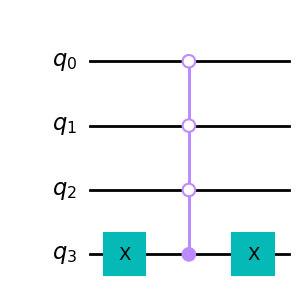

In [3]:
R0(4).definition.draw('mpl')

#### Codificando el marcador $O = R_w$

Comenzando por $R_w$, se trata de  un operador que depende del vector desconocido $w$. Por tanto esa etiqueta debe figurar como un argumento oculto de la función que sirva para construir el operador $V(w)\ket{0} = \ket{w}$.

Simplemente es necesario añadir un operador $X$ por cada $1$ que haya en la versión binaria de $w$.

In [4]:
def Rw(n,w):        
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    wstring = format(int(w), 'b').zfill(n)
    for i,wi in enumerate(reversed(wstring)):
        if wi == '1':
            qc.x(qr[i])
    qc.append(R0(n),qr)        
#    qc.append(ZGate().control(n-1,ctrl_state= 0),qr) # el reflector R0
    for i,wi in enumerate(reversed(wstring)):
        if wi == '1':
            qc.x(qr[i])
    qcRw =  qc.to_gate()
    qcRw.name='Rw'
    return qcRw


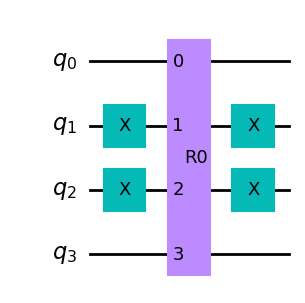

In [5]:
# Sobre un circuito de 4 cúbits, sea el estado w = 6 = 0110 

Rw(4,6).definition.draw('mpl')

#### Codificando el difusor $D = R_{s_\perp}$

Recordemos que $R_{s_\perp} = - R_s$, el reflector *perpendicular* a $\ket{s}$ es el negativo del reflector *paralelo*.

Ahora codificamos el reflector $R_s$. En este caso el operador $V:\ket{0}\to\ket{s}$ es la puerta de Walsh-Hadamard $V=H^{\otimes n}$

In [6]:
def Rs(n):        
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    qc.h(qr)
    qc.append(R0(n),qr)
    qc.h(qr)
    qcRs = qc.to_gate()
    qcRs.name='Rs'
    return qcRs


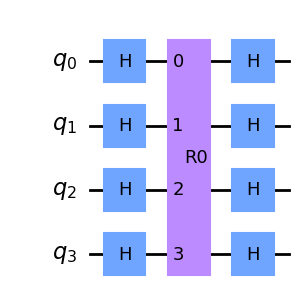

In [7]:
Rs(4).definition.draw('mpl')

Con estos dos ingredientes ya podríamos fabricar el operador de Grover. 

$$
 G = D \, O = -R_s  R_w
$$

::::::{admonition} Notar
:class: note


¡no sabemos implementar  $-R_s$! $~$, sólo $R_s$. De modo que lo más cercano a la iteración de Grover que podemos conseguir es
$
\Rightarrow  R_s R_w = - G 
$

El signo menos, en apariencia es una fase global y no debería afectar a las probabilidades finales que son sus módulos al cuadrado. 
    
De modo que, de momento, lo vamos a ignorar, pero mantenemos una nota de atención sobre este hecho.
::::::



::::{figure} ./figuras/Grover5.png
:width: 600px
:align: center

::::


In [8]:

def G(n,w):                    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 

    qc.append(Rw(n,w),qr)
    qc.append(Rs(n),qr)
    
    qcG=qc.to_gate()
    qcG.name='-G'
    return qcG


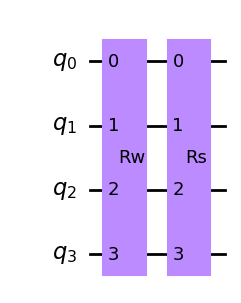

In [9]:
G(4,6).definition.draw('mpl')

#### El circuito de Grover

Finalmente podemos componer el circuito, que contiene la solución $w$ como argumento de $G$

0110


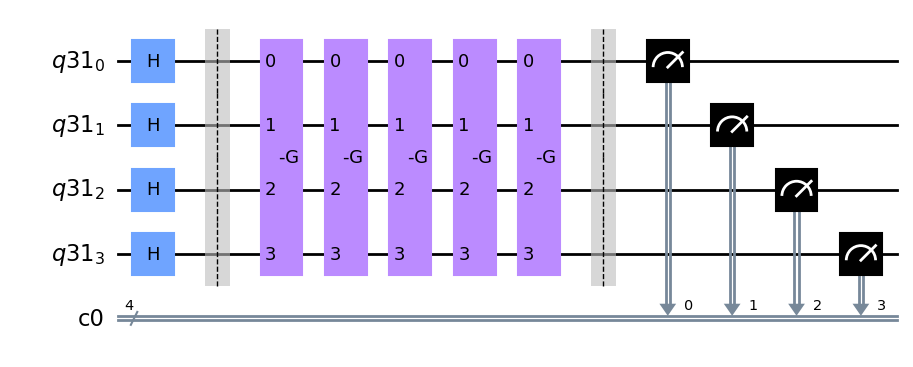

In [10]:
# el número de cúbits de la base de datos
n=4
# el número de iteraciones de Grover
it = 5
# la solución oculta en decimal y en binario
w = 6
wstring = format(int(w), 'b').zfill(n)
print(wstring)

# el circuito de Grover
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qcGrover = QuantumCircuit(qr,cr)
qcGrover.h(qr)
qcGrover.barrier()

for i in range(it):
    qcGrover.append(G(n,w),qr)

qcGrover.barrier()

# medimos el resultado
qcGrover.measure(qr,cr)
qcGrover.draw('mpl')

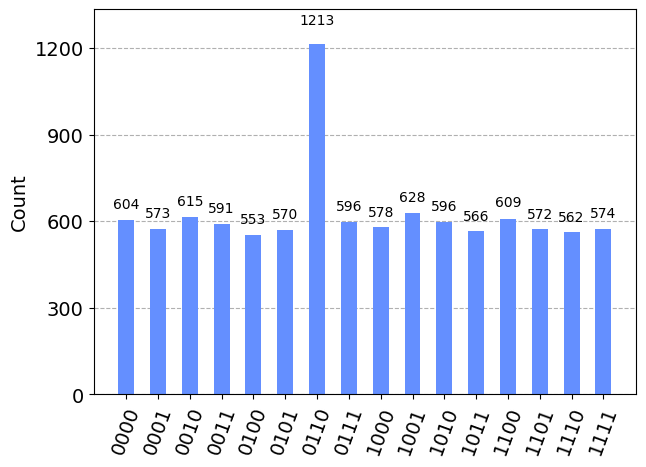

In [11]:
from qiskit import Aer, execute
M_simulator = Aer.get_backend('qasm_simulator')

shots = 10000

# Ejecutamos la simulación y recogemos el número de cuentas de cada estado
cuentas = execute(qcGrover,backend=M_simulator, shots=shots).result().get_counts()


# Calculamos la probabilidad de medir w
#prob_w = cuentas[wstring]/shots
#print(r'La probabilidad de medir w=%s es %f' % (w, prob_w))

# Histogramamos las probabilidades
from qiskit.visualization import plot_histogram
plot_histogram(cuentas)

### La rotación óptima

Se sigue de la figura que ilustra la acción de $G$ que cada iteración de  produce una rotación de ángulo $2\theta$ donde $\theta = \arcsin 1/\sqrt{N}$ es el ángulo inicial

\begin{eqnarray*}
\ket{s} &=&  \sin \theta \ket{w} + \cos  \theta \ket{s'} \nonumber\\ \rule{0mm}{5mm}
G \ket{s} &=& \sin 3\theta \ket{w} + \cos 3 \theta \ket{s'}\\ \rule{0mm}{5mm}
G^2 \ket{s} &=& \sin 5\theta \ket{w} + \cos 5 \theta \ket{s'}\\\rule{0mm}{5mm}
\vdots
\end{eqnarray*}

Esta rotación puede representarse en la forma de una matriz

$$
G\ket{s} = G\begin{bmatrix}\sin\theta \\ \cos\theta\end{bmatrix} = \begin{bmatrix} \sin 2\theta & \cos 2 \theta \\ - \cos 2\theta & \sin 2\theta \end{bmatrix} \begin{bmatrix}\sin\theta \\ \cos\theta \end{bmatrix} =
\begin{bmatrix}\sin 3 \theta \\ \cos3\theta \end{bmatrix}
$$

La iteración del circuito de Grover conduce a una sucesión de vectores

$$
G^k\ket{s} = \begin{bmatrix} \sin 2k\theta & \cos 2k \theta \\ - \cos 2k\theta & \sin 2k\theta \end{bmatrix} \begin{bmatrix}\sin\theta \\ \cos\theta \end{bmatrix} = \begin{bmatrix}\sin(2k+1)\theta  \\
\cos(2k+1)\theta \end{bmatrix}
$$
que giran *sin salirse* del plano $(\ket{w},\ket{s'})$

::::::{admonition} Ejercicio
:class: tip


Prueba esta igualdad
::::::


Esta rotación comienza aumentanto la amplitud del estado $\ket{w}$ ya que $\sin 3\theta > \sin \theta$. Éste es el efecto de *amplificación de amplitud* buscado

Habrá un valor de $k$ para el cuál la iteración se aproxime mucho al valor $\sin (2k+1)\theta \approx 1$. 

Valores de $k$ superiores conducen a una supresión de dicha amplitud al rotar el vector $G^k\ket{s}$ alejándose del eje $\ket{w}$.

Por para conocer el número óptimo de iteraciones, debemos solucionar  la ecuación de *máxima amplitud*

$$
\sin (2k+1)\theta) = 1
$$

- Esta ecuación tendría fácil solución 

$$
(2k+1)\theta)  = \frac{\pi}{2} ~~~~\Rightarrow ~~~~ k = \frac{\pi}{4\theta} - \frac{1}{2}
$$

   si $k$ fuese un número real. 

- Pero es un número entero $ \Rightarrow $ el siguiente teorema da la **solución óptima**

::::::{card} 
<b>Teorema</b>:  

^^^

El valor entero de $k\in{\mathbb Z}$ que maximiza la probabilidad $P_k = \sin^2((2k+1)\theta)$ de medir la solución $w$  es la parte entera 
 

$$
k_{op} = \left[ \frac{\pi}{4\theta} \right]
$$

 donde $\theta = \arcsin \sqrt{\frac{1}{N}}$.
$~$Se cumple en este caso que:

$$
1 - \frac{1}{N} \leq P_{k_{op}} \leq 1\, .
$$
::::::


::::::{admonition} Ejercicio
:class: tip


Ejecuta el algoritmo de Grover variando el número <i>it</i> de iteraciones de Grover y verifica que el valor de $k$ óptimo es el enunciado en el teorema.
::::::


Cuando $N\to \infty$, es decir, cuando nuestra base de datos es muy grande 
el vector inicial tiene un ángulo muy pequeño. 

$$
\theta = \arcsin \frac{1}{\sqrt{N}} \to \frac{1}{\sqrt{N}} - ....
$$

a orden más bajo en serie de potencias de $1/\sqrt{N}$


::::::{card} 
<b>Teorema</b>:  

^^^

En el límite  de $N\to\infty$ el tiempo que necesita el algoritmo de Grover para aproximarse 
máximamente a la solución crece como 


$$
k_{op} \approx \frac{\pi}{4}\sqrt{N}
$$
::::::


Esto supone un crecimiento $\mathcal{O}(\sqrt{N})$ en lugar de $\mathcal{O}(N)$ que es lo que esperaríamos clásicamente. 


## Varias agujas en un pajar 

Un usuario podría tener más de una línea telefónica contratada. En ese caso, *varios* números de teléfono servirán para dar con *un sólo* nombre.

Supondremos ahora que la búsqueda en la base de datos admite $M$ resultados satisfactorios distintos $w_1,....,w_M$.

Ahora los vectores de la base que *son solución* $\{\ket{w_i} \}$ generan un *subespacio* $\mathcal{B} \subset \mathcal{H}$ de dimension $M$.  

Podemos descomponer $~\Hil = {\cal B} \oplus {\cal B}_\perp$ en suma directa de subespacios *solución* y su ortogonal.
Un vector $\ket{x}\notin {\cal B}~$ será $~\ket{x} \in {\cal B}_\perp$

Definamos
\begin{equation*}
\ket{w} = \frac{1}{\sqrt{M}}\sum_{x\in \mathcal{B}}\ket{x} = \frac{1}{\sqrt{M}}\sum_i^M \ket{w_i} \in {\cal B}
~~~~~~~,~~~~~~~~
\ket{s^\prime} = \frac{1}{\sqrt{N-M}}\sum_{x \in \mathcal{B}_\perp}\ket{x} \in {\cal B}_\perp
\end{equation*}

El vector inicial se puede descomponer en suma de sus componentes *a lo largo* de ${\cal B}$ y de ${\cal B}_\perp$


\begin{eqnarray*}
\ket{s} = \frac{1}{\sqrt{N}} \sum_{x\in \Hil} \ket{x} 
&=&  \frac{1}{\sqrt{N}} \sum_{x\in {\cal B}} \ket{x}
 +  \frac{1}{\sqrt{N}} \sum_{x\in {\cal B}_\perp} \ket{x}
\\ \rule{0mm}{12mm}
&=&\sqrt{\frac{M}{N}}\ket{w} + \sqrt{\frac{N-M}{N}}\ket{s^\prime}.
\end{eqnarray*}




Con estas definiciones, las figuras en las que se representan las reflexiones son idénticas y todo ocurre en el *plano de Grover* generado por los vectores $\{\ket{w},\ket{s'}\}$ 

La *única diferencia* está en el valor del ángulo inicial 

$$
\theta = \arcsin \sqrt{\frac{M}{N}}
$$




::::::{card} 
<b>Teorema</b>:  

^^^

El valor entero de $k\in{\mathbb Z}$ que maximiza la probabilidad $P_k = \sin^2 ((2k+1)\theta)$ de medir la solución $w$  es la parte entera de $\pi/4\theta$

    
$$
k_{op} = \left[ \frac{\pi}{4\theta} \right]
$$

 donde $\theta = \arcsin \sqrt{\frac{M}{N}}.~$
En este caso, la probabilidad de medir el estado $\ket{w}$ es

$$
1 - \frac{M}{N} \leq P_{k_{op}} \leq 1 \, .
$$
::::::


en el límite $N\to \infty$ el coste computacional crece aun como la raíz cuadrada

::::::{card} 
<b>Teorema</b>:  

^^^

En el límite  de $N\to\infty$ el tiempo que necesita el algoritmo de Grover para aproximarse 
máximamente a alguna de las soluciones $w_i$, crece como 


$$
k_{op} \approx \frac{\pi}{4}\sqrt{\frac{N}{M}}
$$
::::::


Vemos que el número de iteraciones que hay que realizar es menor. A cambio sólo obtendremos una solución $w_i$ después de cada ejecución.

### El circuito de Grover modificado 

El único operador que necesitamos modificar es $R_w$

In [12]:
def Rw(n,w_array): #w_array es una lista de enteros w_i en S_n  
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    
    for w in w_array:
        wstring = format(int(w), 'b').zfill(n)
        for i,wi in enumerate(reversed(wstring)):
            if wi == '1':
                qc.x(qr[i])
        qc.append(R0(n),qr)        
        for i,wi in enumerate(reversed(wstring)):
            if wi == '1':
                qc.x(qr[i])
    qcRw =  qc.to_gate()
    qcRw.name='Rw'
    return qcRw


Ahora podemos correr el mismo circuito con esta modificación



Primero debemos calcular el valor óptimo de iteraciones $k_{op} = [\pi/(4 \arcsin \sqrt{M/N})]$

In [13]:
# dimensión de la base de datos
n=4
# lista de soluciones ocultas
w_array = [1, 3, 6, 7, 15]

# valor de k óptimo
k_op = int(np.pi/(4*np.arcsin(np.sqrt(len(w_array)/2**n))))
print('k_op =',k_op)

k_op = 1


Ahora construimos el circuito de Grover con $k_{op}$ iteraciones. 

w_i = ['0001', '0011', '0110', '0111', '1111']


/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


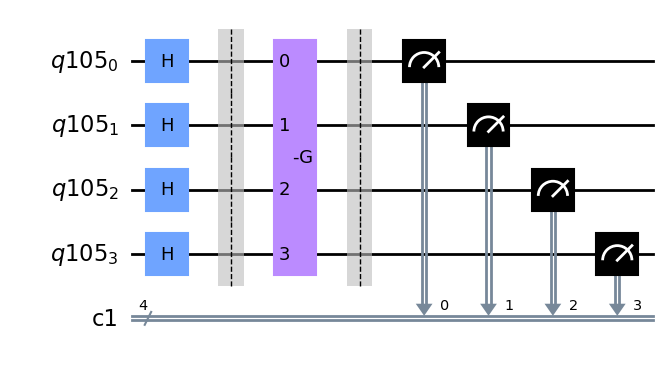

In [14]:
# pasamos las soluciones a cadenas binarias de n entradas
wstring = [format(int(w), 'b').zfill(n) for w in w_array]
print('w_i =',wstring)

qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qcGrover = QuantumCircuit(qr,cr)
qcGrover.h(qr)
qcGrover.barrier()

for i in range(k_op):
    qcGrover.append(G(n,w_array),qr)

qcGrover.barrier()

qcGrover.measure(qr,cr)
qcGrover.draw('mpl')

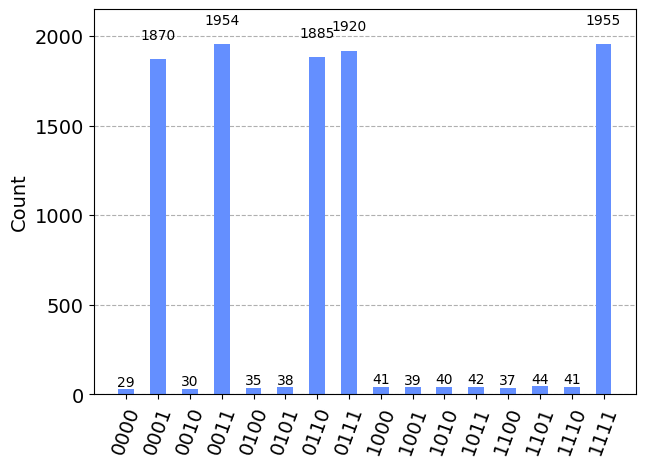

In [15]:
from qiskit import Aer, execute
M_simulator = Aer.get_backend('qasm_simulator')

shots = 10000
# Ejecutamos la simulación y recogemos el número de cuentas de cada estado
counts = execute(qcGrover,backend=M_simulator, shots=shots).result().get_counts()

# Calculamos la probabilidad de medir w
#prob_w = cuentas[wstring]/shots
#print(r'La probabilidad de medir w=%s es %f' % (w, prob_w))

# Histogramamos las probabilidades
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Extraemos los valores que han obtenido las máximas frecuencias de medida

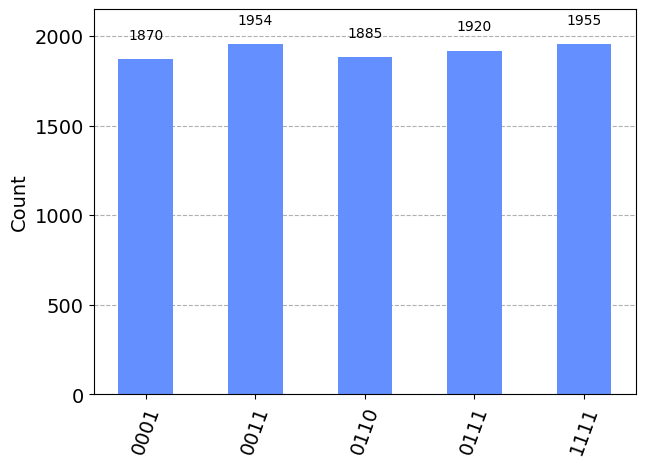

In [16]:
majority_counts = {k: v for k, v in counts.items() if  v>300 }
#print(projected_counts)
plot_histogram(majority_counts)

los convertimos a base decimal

In [17]:
wi_list = sorted([int(keys,2) for  keys in majority_counts]) 
print('{Ns} ~ ', wi_list)



{Ns} ~  [1, 3, 6, 7, 15]


## Contaje cuántico 

En el algoritmos de Grover es crucial saber cuántas iteracions $k$ del operador $G$ hay que realizar. 

En el caso de múltiples soluciones, esto depende de $M$. 

$M$ es desconocido de antemano, por lo que el algoritmo ve *comprometida su eficiencia*. 

En esta sección vamos a explicar **cómo deducir** $M$ como paso previo, invocando el algoritmo de Estimación de Fase Cuántica.

Ya hemos visto que, en la base $\{|\omega\rangle, |s'\rangle\}$, podemos escribir la iteración de Grover como la matriz de rotación

$$
G =
\begin{bmatrix}
\cos2\theta & \sin2\theta\\
-\sin2\theta & \cos2\theta
\end{bmatrix},
$$

donde 

$$
\theta = \arcsin M/N 
$$

Conocer el valor de $\theta$ nos permitiría tener acceso al valor de $$ M  = N\sin\theta 
$$


Los  autovalores  y autoestados  de este operador son los siguientes

$$
 \left(e^{+ 2i\theta}, \begin{bmatrix}- i \\1 \end{bmatrix}\right)~~~~,~~~~ \left( e^{- 2i\theta}, \begin{bmatrix}+ i \\1 \end{bmatrix} \right)
$$ 

que están pidiendo *a gritos* el algoritmo QPE, de estimación cuántica de fase.


::::::{admonition} Ejercicio
:class: tip


Prueba este resultado
::::::


### Una sutileza crucial

En su momento comentamos que el operador que codificamos en el circuito de Grover no es realmente $ R_{s_\perp}$ sino
$R_s = -R_{s_\perp}$



Por tanto, realmente estamos implementando la acción de $ R_s R_w =  -R_{s_\perp}R_w = -G  $.



Este signo global lo hemos despreciado, y sin embargo es relevante a la hora de hacer una estimación de fase.

El operador $-G = G e^{i\pi}$ tiene por autovalores y autovectores

$$
 \left(e^{+ 2i\theta + i\pi}, \begin{bmatrix}- i \\1 \end{bmatrix}\right)~~~~,~~~~ \left( e^{- 2i\theta + i\pi}, \begin{bmatrix}+ i \\1 \end{bmatrix} \right)
$$ 


Vamos a definirlos las cantidades $\varphi_\pm$ relacionadas con los autovalores de $-G$

$$
 e^{\pm  2 i \theta + i\pi} \equiv e^{2\pi i \varphi_\pm} ~~~~\Rightarrow ~~~~ {\pm  2 i \theta + i\pi}  = {2\pi i \varphi_\pm} 
$$

El algoritmo de estimación de fase nos debería dar una aproximación buena a $\varphi_\pm$, y a partír de estos dos valores, a

$$
\theta = \pm (\pi \varphi_\pm - \pi/2)
$$


Vamos a insertar $(-G)^{2^k}$ en un circuito de estimación de fase cuántica con **$t$ cúbits de contaje**

::::{figure} ./figuras/ContajeCuantico.png
:width: 700px
:align: center
::::


A la salida de este circuito, el registro de phase, estará en una combinación de estados $\ket{m_+}$ y $\ket{m_-}$ donde $m_\pm$ están distribuidas en torno a los estimadores de orden $t$  para $ a_\pm = [\varphi_\pm]$ 

El operador $-G \in SU(2)$ puesto que su determinante es 1. 


Por tanto $$e^{2\pi i\varphi_+} e^{2\pi i\varphi_-} = 1$$

El algoritmo de estimación de fase nos dará estimaciones para $~~\varphi_+ = \varphi ~~$ , $~~\varphi_- = 1 - \varphi~,~~$ ambos pertenecientes al intervalo $[0,1)$. 


En **ambos casos** es inmediato verificar que se cumple

$$
\frac{M}{N} \equiv \sin^2 \theta = \sin^2\left( \pi \varphi - \pi/2 \right) = \cos^2 (\pi\varphi) 
$$

A partir de aquí obtenemos 

$$
M = N \cos^2 (\pi \varphi) = N \cos^2 (\pi (1-\varphi)) 
$$

Para generar el circuito de QPE, tenemos que programar la puerta $-G^k$ *controlada*  $~\Rightarrow ~\cg{(-G)^{k}}$ 

In [18]:
def c_G(n,w_array,power): 
    qrG = QuantumRegister(n)
    qcG = QuantumCircuit(qrG) 

    for _ in range(power):
        qcG.append(G(n,w_array),qrG)
    
    c_mG=qcG.to_gate()
    c_mG.name="(-G)^%i" % power
    c_mG = c_mG.control()
    return c_mG


/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


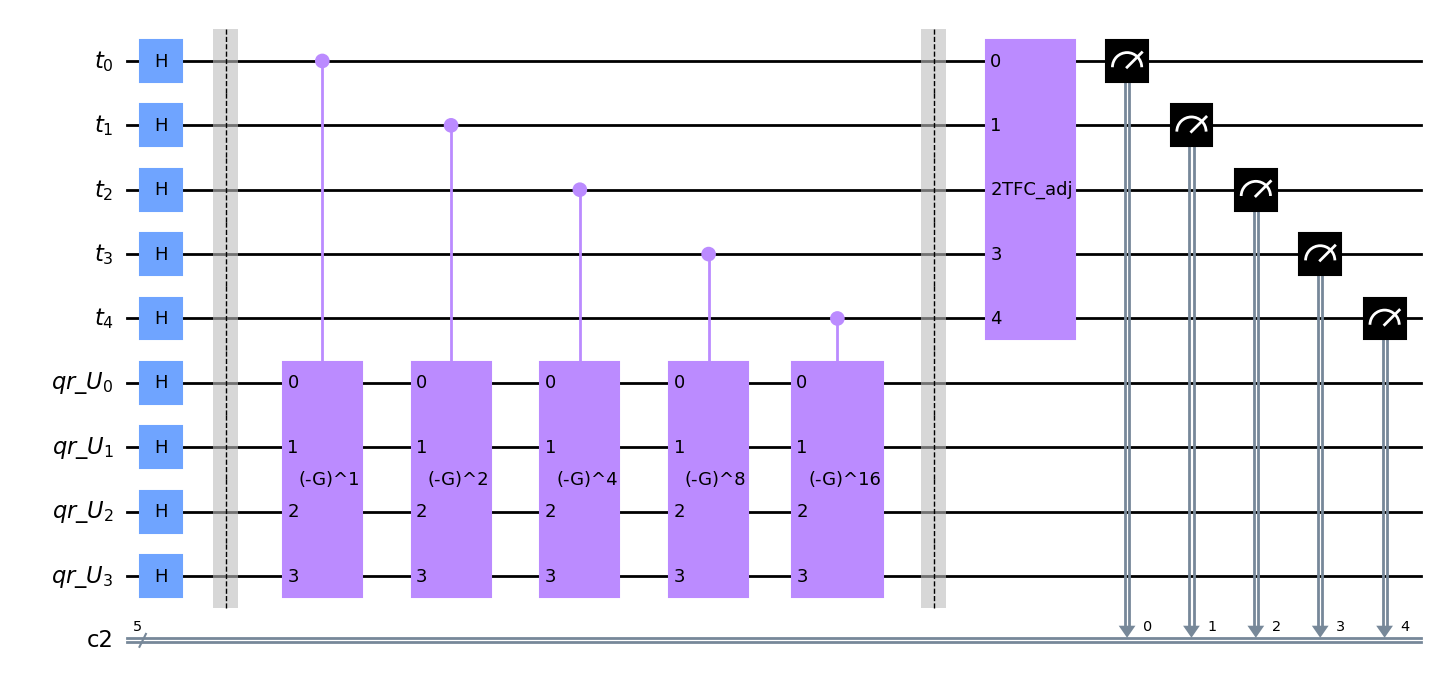

In [19]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 5 # la dimensión del registro de evaluación 
n = 4 

qrt=QuantumRegister(t,name="t")
qra=QuantumRegister(n,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
crt=ClassicalRegister(t)
qpe = QuantumCircuit(qrt,qra,crt)   

qpe.h(range(t+n))
qpe.barrier()

# aplicamos los operadores controlados c((-G)^(2^j))
for j in range(t):
    qpe.append(c_G(n,w_array,2**j),[qrt[j]]+qra[:])
    
qpe.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qpe.append(TFC_adj(t),qrt)

qpe.measure(qrt,crt)

qpe.draw(output="mpl")

Ejecutamos el circuito de estimación de fase

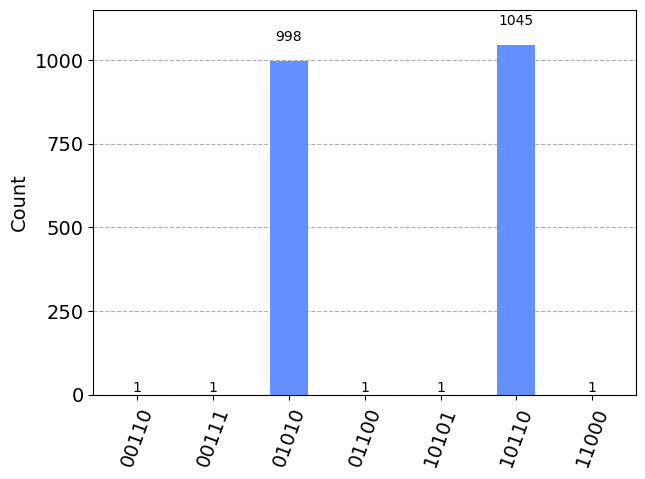

In [20]:
from qiskit import Aer, execute
M_backend = Aer.get_backend('qasm_simulator')

from qiskit.visualization import plot_histogram
results = execute(qpe, M_backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

Extraemos las salidas $m_i$ que tienen máxima probabilidad

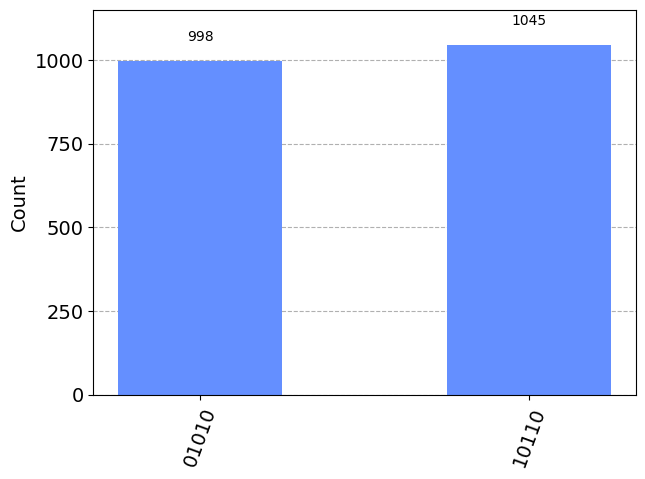

In [21]:
majority_counts = {k: v for k, v in counts.items() if  v>300 }
#print(projected_counts)
plot_histogram(majority_counts)

Convertimos a base decimal y extraemos sucesivamente
$$
m_i  ~~\longrightarrow ~~ a_i = \left[\frac{m_i}{2^t}\right] ~\approx ~\varphi_i ~~\longrightarrow ~~ M_i = [N \cos^2(\pi \varphi_i)]
$$

In [22]:
# la lista de m_i
mi_list = sorted([int(keys,2) for  keys in majority_counts]) 
print('{m_i} ~ ', mi_list)

# la lista de a_i
ai_list = [m/2**t for m in mi_list]

# la lista de M_i
Mi_list = [2**n*np.cos(np.pi*a)**2 for a in ai_list]
print('M_i=', Mi_list)

# redondeo de M_i al entero más próximo
rounded_Mi_list = [round(Mi) for Mi in Mi_list]
print(' M_i =', rounded_Mi_list)


{m_i} ~  [10, 22]
M_i= [4.938532541079283, 4.938532541079277]
 M_i = [5, 5]


The number of solutions $M$ obtained

In [23]:
print('Number of solutions =', round(np.mean(rounded_Mi_list)))

Number of solutions = 5
